## Project Overview

This analysis explores mental health in the tech industry using survey data from 2014. 
The goal is to understand patterns in mental health treatment, workplace factors, and demographic influences.

In [4]:
%pip install pandas
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## I. Data processing

### Load dataset and import essential library

In [2]:
# Import necessary libraries
import pandas as pd

In [3]:
# Load dataset

mental_health = pd.read_csv("Mental Health Dataset.csv")

mental_health.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


### 1. Exploring the Dataset

In [4]:
# Get basic information about the dataset
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [5]:
# View random sample of data
print("Random sample of data:")
print(mental_health.sample(n=5))

Random sample of data:
              Timestamp  Gender         Country Occupation self_employed  \
50065    8/29/2014 9:23  Female   United States    Student            No   
99653   8/28/2014 13:39    Male   United States   Business            No   
114287  8/27/2014 19:34    Male          Canada   Business            No   
123952  8/27/2014 12:52    Male  United Kingdom   Business            No   
113131  8/28/2014 10:05    Male   United States   Business            No   

       family_history treatment      Days_Indoors Growing_Stress  \
50065             Yes        No  Go out Every day            Yes   
99653             Yes       Yes        31-60 days             No   
114287             No        No         1-14 days             No   
123952             No        No  Go out Every day             No   
113131             No        No        31-60 days          Maybe   

       Changes_Habits Mental_Health_History Mood_Swings Coping_Struggles  \
50065             Yes              

In [6]:
# Get total number of rows and columns
print("\nTotal rows and columns:")
print(f"Number of rows: {mental_health.shape[0]}")
print(f"Number of columns: {mental_health.shape[1]}")


Total rows and columns:
Number of rows: 292364
Number of columns: 17


### 2.Handle missing values

In [7]:
# Check for missing values
missing_values = mental_health.isnull().sum()

# Calculate percentange of missing values
missing_percentages = ( missing_values / len(mental_health) * 100).round(2)

# Print missing values and missing percentage
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})

print(missing_info[missing_info['Missing Values'] > 0])

               Missing Values  Percentage
self_employed            5202        1.78


In [8]:
# Fill missing in self_employed with 'No' as the most common case
mental_health['self_employed'] = mental_health['self_employed'].fillna('No')

# Verify missing values are handled
mental_health.isnull().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [9]:
# Check for duplicate rows
duplicates = mental_health.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 2313


In [10]:
# Remove duplicates if any exist
mental_health = mental_health.drop_duplicates()

In [11]:
# Verify the final shape after cleaning
print(f"\nDataset after preprocessed: {mental_health.shape}")


Dataset after preprocessed: (290051, 17)


### 3. Encoding categorical data

In [12]:

# Convert 'Gender' to numerical values: Male -> 1, Female -> 0
mental_health['Gender'] = mental_health['Gender'].map({'Male': 1, 'Female': 0})

# Display the updated dataset
mental_health.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,0,United States,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,0,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,0,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,0,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,0,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


### 4.Creating a processed dataset

In [13]:

# Save the processed dataset to a new CSV file
mental_health.to_csv("mental_health_processed.csv", index=False)

print("Processed dataset saved as 'mental_health_processed.csv'.")


Processed dataset saved as 'mental_health_processed.csv'.


### Data cleaning process conclusion

1. Handled missing values in 'self_employed' column by filling with 'No'
2. Removed duplicate entries
3. Encoded categorical variables (Gender: Male->1, Female->0)
4. Created processed dataset for analysis

## II. Data object and attribute types


### 1. Analyze unique data


In [14]:
# Load dataset

mental_health_processed = pd.read_csv("mental_health_processed.csv")

mental_health_processed.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,0,United States,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,0,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,0,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,0,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,0,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [15]:
# Initialize lists for each attribute type
nominal_attributes = []
binary_attributes = []
ordinal_attributes = []
check_manually_attributes = []

# Analyze unique values in each column and categorize attributes
print("Analysis of attribute types:\n")

for column in mental_health_processed.columns:
    unique_values = mental_health_processed[column].unique()
    n_unique = len(unique_values)
    
    print(f"\n{column}:")
    print(f"Number of unique values: {n_unique}")
    print(f"Unique values: {sorted(unique_values)}")
    
    # Determine the attribute type and append to the list
    if n_unique == 2:
        binary_attributes.append(column)
    elif n_unique <= 4 and isinstance(unique_values[0], (str, int)):
        ordinal_attributes.append(column)
    elif n_unique > 10 or isinstance(unique_values[0], (float, pd.Timestamp)):
        nominal_attributes.append(column)
    else:
        check_manually_attributes.append(column)


Analysis of attribute types:


Timestamp:
Number of unique values: 580
Unique values: ['10/2/2014 21:25', '11/16/2014 8:42', '12/1/2014 9:58', '12/15/2014 0:43', '2/1/2016 23:04', '2/21/2015 10:00', '2/21/2015 17:19', '2/21/2015 18:54', '2/21/2015 18:59', '2/21/2015 4:16', '2/21/2015 4:32', '2/21/2015 4:41', '2/21/2015 4:55', '2/21/2015 5:11', '2/21/2015 5:34', '2/21/2015 5:55', '2/21/2015 6:19', '2/21/2015 8:21', '2/21/2015 8:54', '2/21/2015 9:18', '2/21/2015 9:19', '2/21/2015 9:22', '2/21/2015 9:30', '2/21/2015 9:48', '2/22/2015 2:40', '2/24/2015 10:32', '2/24/2015 8:54', '2/24/2015 9:00', '2/24/2015 9:13', '2/24/2015 9:18', '4/11/2015 14:35', '4/2/2015 15:47', '4/23/2015 14:03', '5/6/2015 10:14', '5/6/2015 16:55', '6/25/2015 12:24', '7/27/2015 23:25', '8/17/2015 9:38', '8/25/2015 19:59', '8/27/2014 11:29', '8/27/2014 11:30', '8/27/2014 11:31', '8/27/2014 11:32', '8/27/2014 11:33', '8/27/2014 11:34', '8/27/2014 11:35', '8/27/2014 11:36', '8/27/2014 11:37', '8/27/2014 11:38', '8/27/20

### 2. Categorize attributes


In [16]:
# Print the categorized attributes
print("\nNominal Attributes:")
for attr in nominal_attributes:
    print(f"- {attr}")

print("\nBinary Attributes:")
for attr in binary_attributes:
    print(f"- {attr}")

print("\nOrdinal Attributes:")
for attr in ordinal_attributes:
    print(f"- {attr}")

print("\nAttributes to Check Manually:")
for attr in check_manually_attributes:
    print(f"- {attr}")


Nominal Attributes:
- Timestamp
- Country

Binary Attributes:
- Gender
- self_employed
- family_history
- treatment
- Coping_Struggles

Ordinal Attributes:
- Growing_Stress
- Changes_Habits
- Mental_Health_History
- Mood_Swings
- Work_Interest
- Social_Weakness
- mental_health_interview
- care_options

Attributes to Check Manually:
- Occupation
- Days_Indoors


#### Nominal attributes

In [17]:
# nominal attributes
nominal_attributes = [
    'Timestamp',
    'Country',
    'Occupation'
]

print("\nNominal Attributes:")
for attr in nominal_attributes:
    print(f"- {attr}")


Nominal Attributes:
- Timestamp
- Country
- Occupation


#### Binary attributes

In [18]:
# binary attributes
binary_attributes = [
    'Gender',  # After conversion to 0/1
    'self_employed',  # Yes/No
    'family_history',  # Yes/No
    'treatment',  # Yes/No
    'Growing_Stress',  # Yes/No
    'Changes_Habits',  # Yes/No
    'Mental_Health_History',  # Yes/No
    'Coping_Struggles',  # Yes/No
    'Work_Interest',  # Yes/No
    'Social_Weakness'  # Yes/No
]

print("\nBinary Attributes:")
for attr in binary_attributes:
    print(f"- {attr}")


Binary Attributes:
- Gender
- self_employed
- family_history
- treatment
- Growing_Stress
- Changes_Habits
- Mental_Health_History
- Coping_Struggles
- Work_Interest
- Social_Weakness


#### Ordinal attributes

In [19]:
# ordinal attributes
ordinal_attributes = [
    'Days_Indoors',  # 1-14 days, 15-30 days, 31-60 days, More than 2 months
    'Mood_Swings',  # Low, Medium, High
    'mental_health_interview',  # No, Maybe, Yes
    'care_options'  # No, Not sure, Yes
]

print("\nOrdinal Attributes:")
for attr in ordinal_attributes:
    print(f"- {attr}")


Ordinal Attributes:
- Days_Indoors
- Mood_Swings
- mental_health_interview
- care_options


## III. Statistics


In [20]:
import numpy as np

#### Convert data to numeric columns


In [21]:
# Convert binary columns from Yes/No to 1/0
numeric_data = mental_health_processed.copy()

binary_columns = ['self_employed', 'family_history', 'treatment', 
                 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History',
                 'Coping_Struggles', 'Work_Interest', 'Social_Weakness']

for column in binary_columns:
    numeric_data[column] = numeric_data[column].map({'Yes': 1, 'No': 0, 'Maybe': 0.5})

### Calculate statistics

In [22]:
# calculate statistics for each numeric columns

stats_summary = pd.DataFrame()

for column in numeric_data.select_dtypes(include=[np.number]).columns:
    stats = {
        'Mean': np.mean(numeric_data[column]),
        'Median': np.median(numeric_data[column]),
        'Std Dev': np.std(numeric_data[column]),
        'Variance': np.var(numeric_data[column]),
        'Min': np.min(numeric_data[column]),
        'Max': np.max(numeric_data[column]),
        'Sum': np.sum(numeric_data[column]),
        'Product': np.prod(numeric_data[column])
    }
    stats_summary[column] = pd.Series(stats)

In [23]:

# Display the statistics
print("Statistical Summary:")
print(stats_summary.round(3))

Statistical Summary:
              Gender  self_employed  family_history   treatment  \
Mean           0.820          0.100           0.395       0.504   
Median         1.000          0.000           0.000       1.000   
Std Dev        0.384          0.301           0.489       0.500   
Variance       0.147          0.090           0.239       0.250   
Min            0.000          0.000           0.000       0.000   
Max            1.000          1.000           1.000       1.000   
Sum       237900.000      29147.000      114533.000  146184.000   
Product        0.000          0.000           0.000       0.000   

          Growing_Stress  Changes_Habits  Mental_Health_History  \
Mean               0.512           0.538                  0.481   
Median             0.500           0.500                  0.500   
Std Dev            0.405           0.409                  0.410   
Variance           0.164           0.167                  0.168   
Min                0.000           0.000

## IV. Visualization


In [24]:
# Install matplot library
%pip install matplotlib

# Import matplot library
import matplotlib.pyplot as plt
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


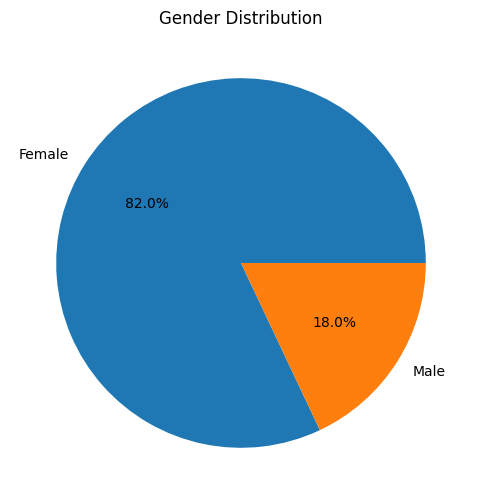

Gender Distribution Breakdown (1 = Female, 0 = Male):
Gender
1    237900
0     52151
Name: count, dtype: int64


In [25]:
plt.figure(figsize=(8, 6))
gender_counts = mental_health_processed['Gender'].value_counts()
plt.pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

# Numerical breakdown
print("Gender Distribution Breakdown (1 = Female, 0 = Male):")
print(gender_counts)

Note: you may need to restart the kernel to use updated packages.


<Figure size 1200x600 with 0 Axes>

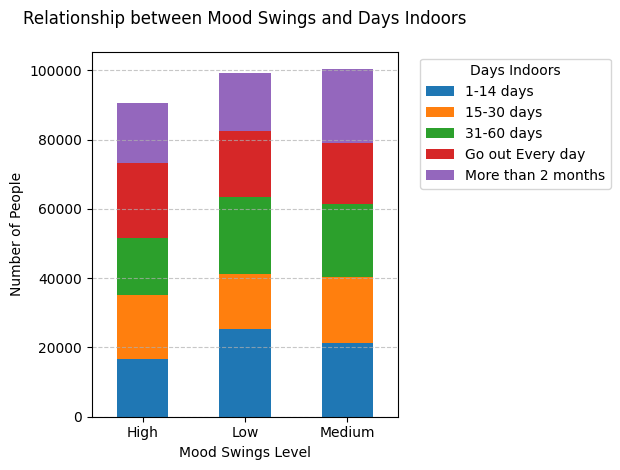


Numerical breakdown:
Days_Indoors  1-14 days  15-30 days  31-60 days  Go out Every day  \
Mood_Swings                                                         
High              16561       18512       16687             21446   
Low               25353       15830       22298             18996   
Medium            21199       19132       21073             17539   

Days_Indoors  More than 2 months  
Mood_Swings                       
High                       17297  
Low                        16687  
Medium                     21441  


In [27]:
%pip install seaborn
# Import seaborn 
import seaborn as sns

mood_days = pd.crosstab(mental_health_processed['Mood_Swings'], 
                        mental_health_processed['Days_Indoors'])

plt.figure(figsize=(12, 6))

mood_days.plot(kind='bar', stacked=True)

plt.title('Relationship between Mood Swings and Days Indoors', fontsize=12, pad=20)
plt.xlabel('Mood Swings Level', fontsize=10)
plt.ylabel('Number of People', fontsize=10)
plt.legend(title='Days Indoors', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

print("\nNumerical breakdown:")
print(mood_days)

### Mood and Indoor Time Correlation
There appears to be a relationship between time spent indoors and mood swings, with those spending more time indoors showing a higher tendency toward severe mood swings.

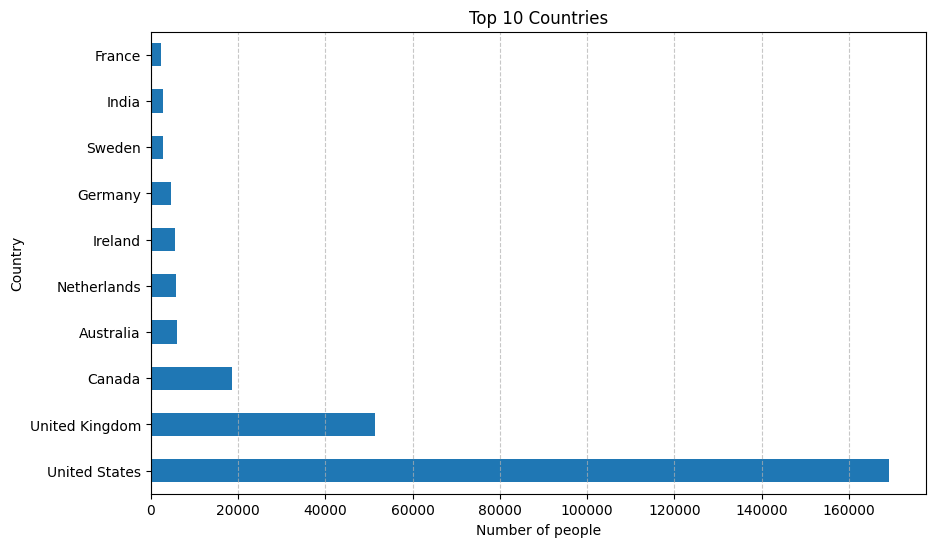

Top 10 Countries Breakdown:
Country
United States     169112
United Kingdom     51356
Canada             18699
Australia           6014
Netherlands         5891
Ireland             5542
Germany             4680
Sweden              2812
India               2771
France              2340
Name: count, dtype: int64


In [28]:
plt.figure(figsize=(10, 6))
country_counts = mental_health_processed['Country'].value_counts().head(10)
country_counts.plot(kind='barh')
plt.title('Top 10 Countries')
plt.xlabel('Number of people')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print("Top 10 Countries Breakdown:")
print(country_counts)


### Geographic Distribution
The United States dominates the survey responses, accounting for 62.8% of all participants, followed by the United Kingdom and Canada. This geographic concentration should be considered when generalizing the findings.

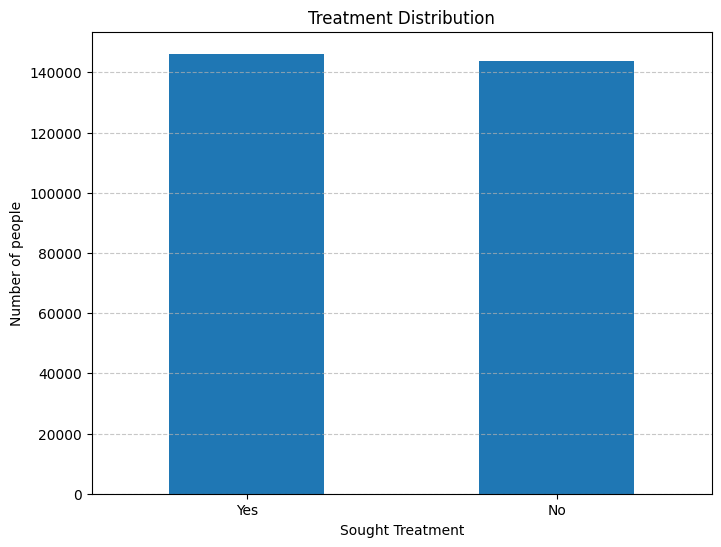

Treatment Distribution Breakdown:
treatment
Yes    146184
No     143867
Name: count, dtype: int64


In [29]:
plt.figure(figsize=(8, 6))
treatment_counts = mental_health_processed['treatment'].value_counts()
treatment_counts.plot(kind='bar')
plt.title('Treatment Distribution')
plt.xlabel('Sought Treatment')
plt.ylabel('Number of people')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Treatment Distribution Breakdown:")
print(treatment_counts)

### Treatment Distribution Insights
The analysis shows that approximately 50.4% of respondents sought treatment for mental health issues, while 49.6% did not. This near-even split suggests that seeking treatment is a common but not universal response to mental health concerns in the tech industry.

# Final Conclusion

This analysis explores mental health in the tech industry using survey data from 2014. 
Key findings include:
- Gender distribution shows 82% female and 18% male participants
- 62.8% of respondents are from the United States
- 50.4% of respondents sought mental health treatment
- There appears to be a correlation between indoor time and mood swings

Methodology included data cleaning, statistical analysis, and visualization of key metrics.